In [1]:
from utils.utils import *
from utils.Algorithms import *
from utils.GraphCreation import *
from utils.Metrics import *
import pandas as pd
np.random.seed(0)

In [6]:
def runResults(matrix, trueclusters, k, algorithms, metrics):

    """
    Runs the algorithms and returns a dataframe with the results on the metrics
    
    Parameters
    ----------
    
    matrix (numpy.ndarray) Adjacency matrix of the graph
    true_clusters (list) List of the true clusters
    k (int) Number of target clusters
    algorithms (list) List of algorithms to run
    metrics (list) List of metrics to use

    Returns
    -------
    results (pandas.DataFrame) Dataframe with the results
    """

    results = pd.DataFrame(columns = ['Algorithm'] + [metric.__name__ for metric in metrics]+ ["Run Time"])

    for algorithm in algorithms:
        if algorithm.__name__ == 'SC_SR':
            predictions, run_time = algorithm(matrix, k, true_clusters = trueclusters)
            new_line = [algorithm.__name__] + [round(metric(predictions, trueclusters), 2) for metric in metrics] + [round(run_time, 2)]
            results.loc[len(results.index)] = new_line
        else:
            predictions, run_time = algorithm(matrix, k)
            new_line = [algorithm.__name__] + [round(metric(predictions, trueclusters), 2) for metric in metrics] + [round(run_time, 2)]
            results.loc[len(results.index)] = new_line

    results.set_index('Algorithm', inplace = True)

    return results

In [3]:
algorithms = [SC_GED, SC_SR, SC_SUM, SC_AL,CoR]
metrics = [Purity, NMI, RI]

# Simple Two-Layer Graph

In [4]:
#On peut faire des seuils pour la connection entre potes
#par exemple
HIGH = 0.8
MEDIUM = 0.5
LOW = 0.3

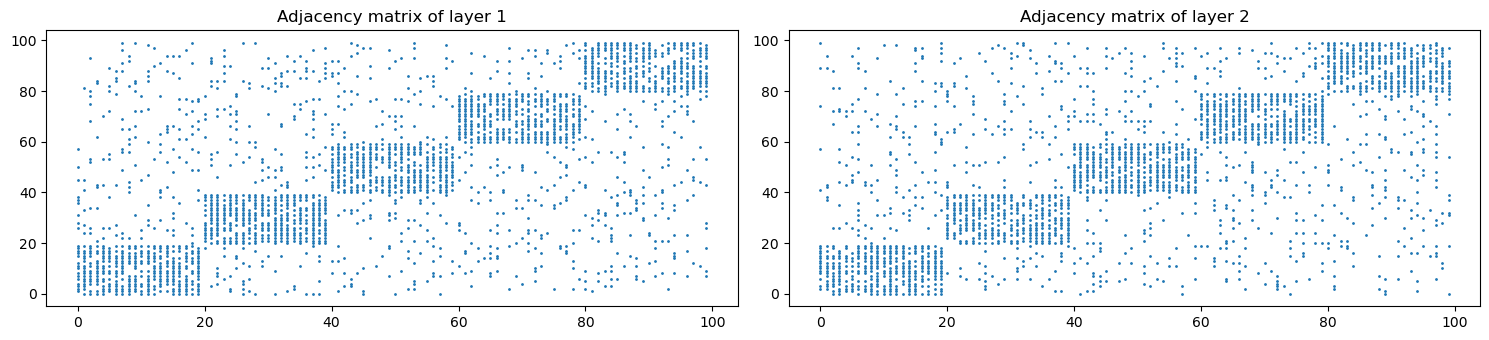

True assignment  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


,Purity,NMI,RI,Run Time
Algorithm,,,,
SC_GED,1.0,1.0,1.0,1.81
SC_SR,1.0,1.0,1.0,0.07
SC_SUM,1.0,1.0,1.0,0.00
SC_AL,1.0,1.0,1.0,0.03
CoR,1.0,1.0,1.0,6.40


In [7]:
n = 100
M = 2
k = 5

p = HIGH
delta = 0.7 #should be between 0 and p ; on peut le varier varier pour avoir une courbe

prob = np.full((k,M), p)
prob_prime = np.full((k,k,M), p-delta)
clusters_size = k*[20]

matrix,true_clusters = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)
print("True assignment ", true_clusters)
results = runResults(matrix, true_clusters, k, algorithms, metrics)
results

# More complicated

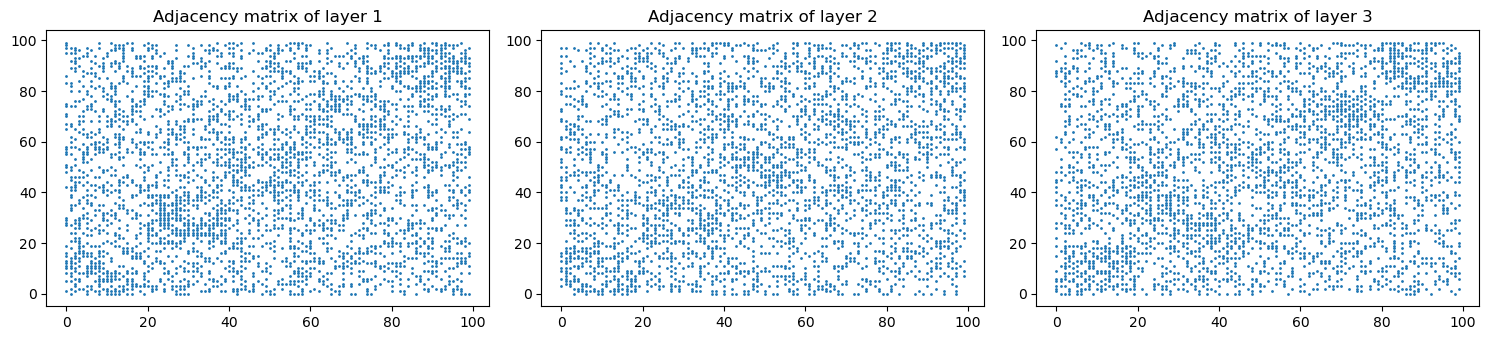

,Purity,NMI,RI,Run Time
Algorithm,,,,
SC_GED,0.38,0.16,0.71,2.16
SC_SR,0.38,0.14,0.71,0.11
SC_SUM,0.72,0.58,0.82,0.00
SC_AL,0.88,0.73,0.91,0.03
CoR,0.38,0.15,0.72,6.57


In [8]:
n = 100
M = 3
k = 5

p = MEDIUM

prob = np.full((k,M),0.5)
#prob[:,2] = np.array(k*[0.8])
#prob[:,3] = np.array(k*[0.8])


prob_prime1 = np.full((k,k),0.3)
prob_prime2 = np.full((k,k),0.3)
#prob_prime3 = np.full((k,k),0.8)
#prob_prime4 = np.full((k,k),0.8)
prob_prime5 = np.full((k,k),0.3)

prob_prime = np.stack((prob_prime1,prob_prime2,prob_prime5),axis=2)
clusters_size = k*[20]

matrix,index_cluster = graphCreation(n,M,k,clusters_size,prob,prob_prime, plot_adj = True)

results = runResults(matrix, true_clusters, k, algorithms, metrics)
results

-Lorsque la premiere couche est + informative que les autres : SC_GED, CoR sont a peu pres égaux, et meilleurs que les 2 autres.

- 5 couches très peu informatives (0.4 contre .35) SC_GED surpassé par SC_SUM (logique, mais pas de bcp).

- 10 couches très peu informatives, même résultat, l'écart ne se creuse pas forcément bcp.

- 3 couches, informatives de manière différente. SC_GED et CoR équivalents, un peu devant les autres mais pas bcp

- 5 couches informatives de manière différente, même constat

- 2 couches de bruit parmi 5 couches. SC_AL, SC_SUM meilleur que les deux autres (et plutot de bcp). (0.38,0.51,0.7,0.35).

- on enlève ces 2 couches de bruits : SC_SUM et SC_AL ont leur résultats qui augmentent (bcp pour le premier), SC_GED inchangé.

